by Ben Nachman  
shared with Flip Tanedo, 18 January 2019

In [5]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [6]:
signal = np.random.normal(0,1,1000)
background = np.random.normal(1,1,1000)

(array([  2.,   1.,   4.,   5.,  18.,  19.,  44.,  64.,  78., 111., 103.,
         98., 106.,  85.,  85.,  56.,  55.,  35.,  14.,  12.,   1.,   2.,
          2.]),
 array([-2.22234478, -1.94282007, -1.66329536, -1.38377064, -1.10424593,
        -0.82472122, -0.54519651, -0.26567179,  0.01385292,  0.29337763,
         0.57290235,  0.85242706,  1.13195177,  1.41147649,  1.6910012 ,
         1.97052591,  2.25005062,  2.52957534,  2.80910005,  3.08862476,
         3.36814948,  3.64767419,  3.9271989 ,  4.20672362]),
 <a list of 23 Patch objects>)

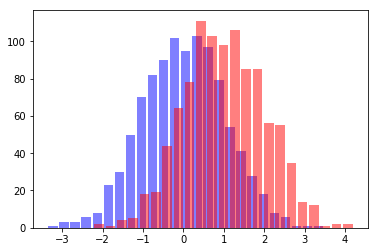

In [7]:
plt.hist(signal, bins='auto', color='blue', alpha=0.5, rwidth=0.85)
plt.hist(background, bins='auto', color='red', alpha=0.5, rwidth=0.85)

In [8]:
signal_labels = np.ones(len(signal))
background_labels = np.zeros(len(background))
X = np.concatenate((signal, background))
Y = np.concatenate((signal_labels, background_labels))

In [9]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Fit the model
model.fit(X, Y, epochs=2, batch_size=10)

Epoch 1/2
2000/2000 [==============================] - 1s 431us/step - loss: 0.7612 - acc: 0.5015
Epoch 2/2
2000/2000 [==============================] - 0s 120us/step - loss: 0.6138 - acc: 0.6715


In [12]:
predictions = model.predict(X)

In [13]:
fpr, tpr, _ = roc_curve(Y, predictions)

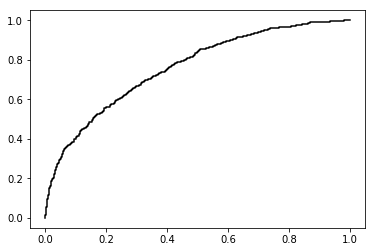

In [14]:
plt.plot(fpr, tpr, color='black')